<font size = 6>
Проверка нормальности распределения

**Выполнил** - Карабалин Руслан, ММБ-104

**Цель работы** - проверить гипотезу о нормальности распределения исследуемого признака генеральной совокупности.

# Введение

Подключение библиотек pandas, matplotlib.pyplot, numpy, scipy.stats:

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Импортирование данных

In [133]:
from google.colab import drive
drive.mount('/content/drive')
ds0 = pd.read_excel("/content/drive/MyDrive/python/ml/lab2/ML.ds2.xlsx")
ds0.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v72,v73,v74,v75,v76,v77,v78,v79,v80,G
0,6.059313,-1.855521,-17.162673,11.044343,-23.341780,-42.520243,53.133029,17.829904,15.312515,46.026926,...,18.143563,-14.173505,-12.908814,-30.324509,11.314424,35.557165,18.456091,7.427282,-30.388955,1
1,11.853664,-1.287746,-26.281267,-21.672478,0.978450,-19.722558,-45.017433,19.227115,34.183479,65.385567,...,1.447923,-4.507531,-5.578855,3.159857,30.422340,34.115070,18.175637,7.389731,-29.035627,3
2,7.770431,-6.649831,-18.138106,-9.144086,-6.882682,-50.593063,-7.432258,18.870878,32.183995,-15.468149,...,17.018063,-6.249020,-21.093471,-11.894213,30.611333,-9.326853,11.518727,39.650201,-28.201074,3
3,9.634201,18.295676,-1.251677,-5.454505,-10.419025,-15.419516,3.636486,14.139482,19.376166,-1.363523,...,5.788373,13.385526,-0.883430,-28.111708,7.078885,24.275838,23.820348,-2.653444,-26.810639,1
4,9.693239,-2.421079,-10.350603,-9.555780,14.607057,13.658101,-8.667340,20.476363,27.179034,42.885804,...,4.913177,-16.022962,-20.864255,-17.932962,20.897679,-5.641990,7.759069,-1.067956,-24.843948,1


Выделим в отдельную таблицу столбцы v31 и G, переименуем их в s31 и Factor соотвественно

In [134]:
ds = ds0[["v31", "G"]].rename(columns = {"v31": "s31", "G": "Factor"})
ds.head()

,s31,Factor
0,6.059313,1
1,21.880059,3
2,-0.584336,3
3,9.634201,1
4,9.693239,1


Выделим независимые выборки в отдельные переменные

In [135]:
sample1 = ds.s31[ds.Factor == 1]
sample1.head()

0      6.059313
3      9.634201
4      9.693239
6     12.659863
10     6.970433
Name: s31, dtype: float64

In [136]:
sample2 = ds.s31[ds.Factor == 2]
sample2.head()

7      6.409792
29    25.310798
30    19.320092
31     6.742986
32    17.715494
Name: s31, dtype: float64

In [137]:
sample3 = ds.s31[ds.Factor == 3]
sample3.head()

1    21.880059
2    -0.584336
5     3.709480
8     6.271083
9    18.381699
Name: s31, dtype: float64

In [138]:
sample4 = ds.s31[ds.Factor == 4]
sample4.head()

169     7.308725
171    10.906552
174     6.009552
175     5.407727
176    13.361156
Name: s31, dtype: float64

Примечание: номер выборки соответсвует номеру признака на соответствующей генеральной совокупности

# Визуализация данных

Для каждой из четырех выборок построим следующие диаграммы: гистограмму совместно с графиком плотности нормального распределения и квантильный график нормального распределения. Проанализируем можно ли использовать нормальное распределение в качестве модельного для описания исследуемого показателя, определенного на соответствующей генеральной совокупности.

## Выборка 1

Выделим в отдельные переменные выборочное среднее, выборочное стандартное отклонение, максимум и минимум выборки:

In [139]:
mean = np.mean(sample1)
std = np.std(sample1)
smax = np.max(sample1)
smin = np.min(sample1)

Построим квантильный график:

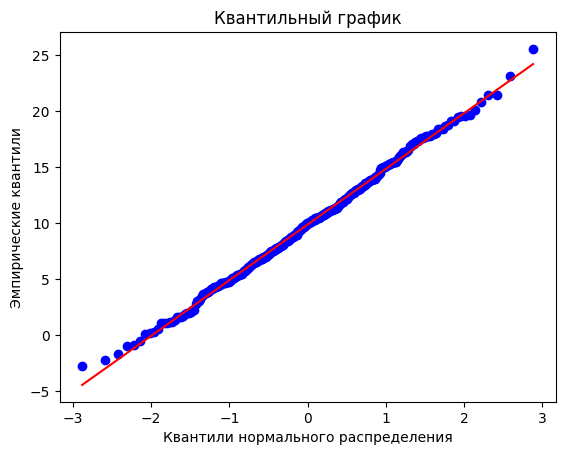

In [140]:
stats.probplot(sample1, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Эмпирические квантили")
plt.xlabel("Квантили нормального распределения")
plt.show()

Точки квантильного графика расположены вдоль биссектрисы, поэтому эмпирические кванитили близки к теоретическим. Нормальное распределение подходит для описания исследуемого признака первой генеральной совокупности.

Построим диаграмму сравнения эмпирической плотности первой выборки и плотности соответствующего нормального распределения:

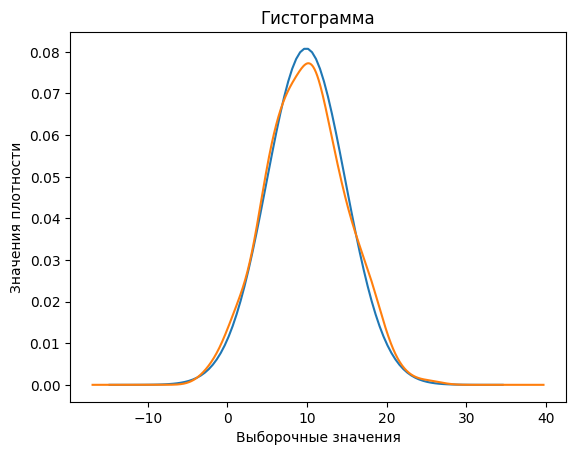

In [141]:
x = np.linspace(mean - 5 * std, mean + 5 * std, 100)
plt.plot(x, stats.norm.pdf(x, mean, std))
sample1.plot.kde()
plt.title("Гистограмма")
plt.ylabel("Значения плотности")
plt.xlabel("Выборочные значения")
plt.show()

Кривая эмпирической плотности близка к кривой плотности нормального распределения, поэтому нормальное распределение подходит для описания исследуемого признака первой генеральной совокупности.

Построим график сравнения эмпирической функции распределения первой выборки и функции распределения соответствующего нормального распределения:

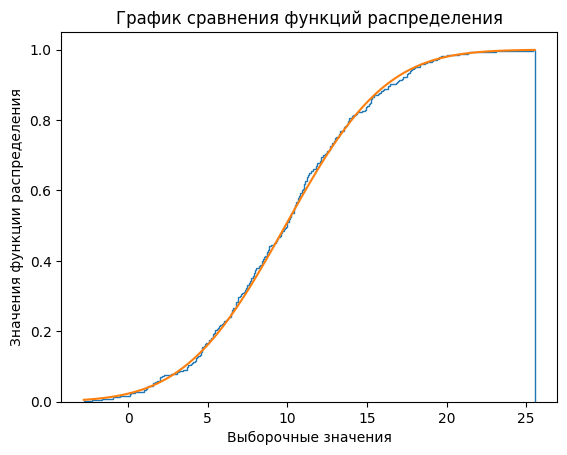

In [142]:
plt.hist(sample1, histtype='step', density=True, cumulative=True,  bins=len(sample1))
x = np.linspace(smin, smax, 100)
plt.plot(x, stats.norm.cdf(x, mean, std))

plt.title("График сравнения функций распределения")
plt.ylabel("Значения функции распределения")
plt.xlabel("Выборочные значения")
plt.show()

Кривая эмпирической функции распределения близка к кривой функции распределения нормального распределения, поэтому нормальное распределение подходит для описания исследуемого признака первой генеральной совокупности.

Анализ диаграмм показал, что нормальное распределение подходит для описания исследуемого показателя первой генеральной совокупности.

## Выборка 2

Выделим в отдельные переменные выборочное среднее, выборочное стандартное отклонение, максимум и минимум выборки:

In [177]:
mean = np.mean(sample2)
std = np.std(sample2)
smax = np.max(sample2)
smin = np.min(sample2)

Построим квантильный график:

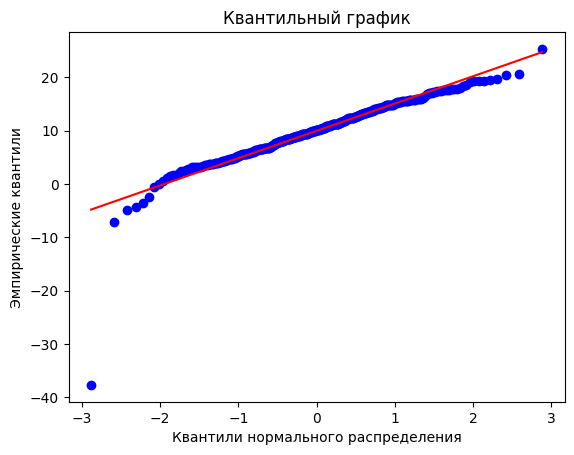

In [178]:
stats.probplot(sample2, dist="norm", plot=plt)
plt.title("Квантильный график")
plt.ylabel("Эмпирические квантили")
plt.xlabel("Квантили нормального распределения")
plt.show()

Точки квантильного графика расположены вдоль биссектрисы, поэтому эмпирические кванитили близки к теоретическим. Нормальное распределение подходит для описания исследуемого признака второй генеральной совокупности.

Построим диаграмму сравнения эмпирической плотности второй выборки и плотности соответствующего нормального распределения:

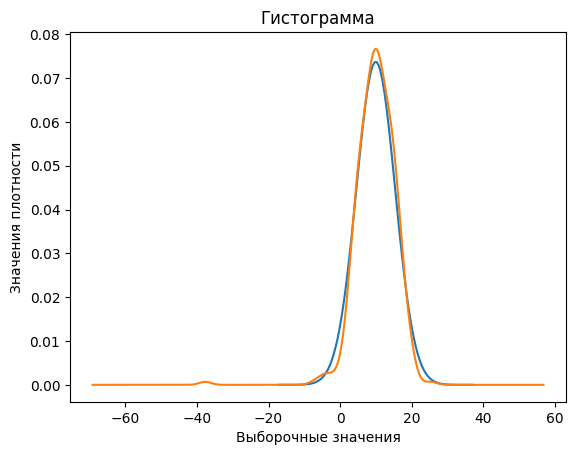

In [179]:
x = np.linspace(mean - 5 * std, mean + 5 * std, 100)
plt.plot(x, stats.norm.pdf(x, mean, std))
sample2.plot.kde()
plt.title("Гистограмма")
plt.ylabel("Значения плотности")
plt.xlabel("Выборочные значения")
plt.show()

Кривая эмпирической плотности близка к кривой плотности нормального распределения, поэтому нормальное распределение подходит для описания исследуемого признака второй генеральной совокупности.

Построим график сравнения эмпирической функции распределения второй выборки и функции распределения соответствующего нормального распределения

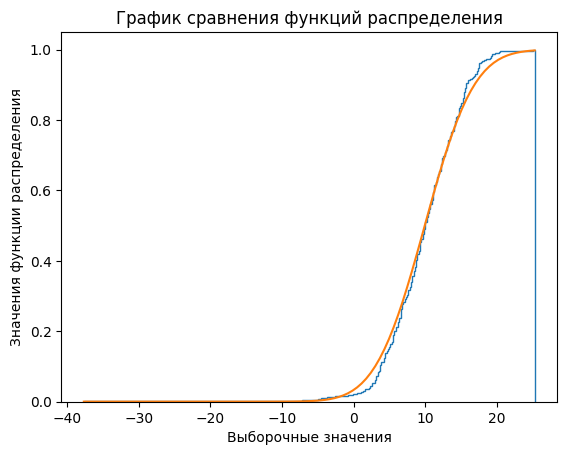

In [180]:
plt.hist(sample2, histtype='step', density=True, cumulative=True,  bins=len(sample2))
x = np.linspace(smin, smax, 100)
plt.plot(x, stats.norm.cdf(x, mean, std))

plt.title("График сравнения функций распределения")
plt.ylabel("Значения функции распределения")
plt.xlabel("Выборочные значения")
plt.show()

Кривая эмпирической функции распределения близка к кривой функции распределения нормального распределения, поэтому нормальное распределение подходит для описания исследуемого признака второй генеральной совокупности.

Анализ диаграмм показал, что нормальное распределение подходит для описания исследуемого показателя второй генеральной совокупности.

## Выборка 3

Выделим в отдельные переменные выборочное среднее, выборочное стандартное отклонение, максимум и минимум выборки:

In [147]:
mean = np.mean(sample3)
std = np.std(sample3)
smax = np.max(sample3)
smin = np.min(sample3)

Построим квантильный график:

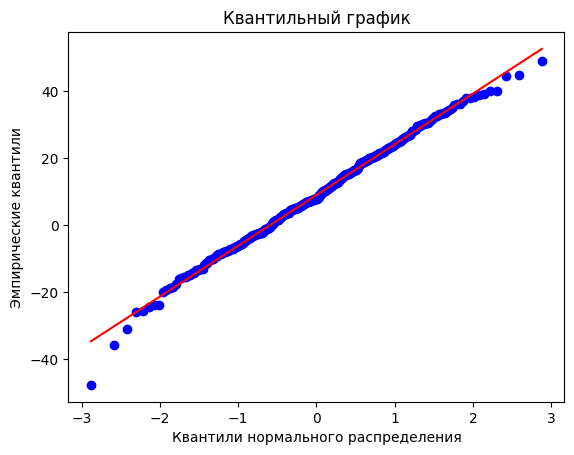

In [148]:
stats.probplot(sample3, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Эмпирические квантили")
plt.xlabel("Квантили нормального распределения")
plt.show()

Точки квантильного графика расположены вдоль биссектрисы, поэтому эмпирические кванитили близки к теоретическим. Нормальное распределение подходит для описания исследуемого признака третьей генеральной совокупности.

Построим диаграмму сравнения эмпирической плотности третьей выборки и плотности соответствующего нормального распределения:

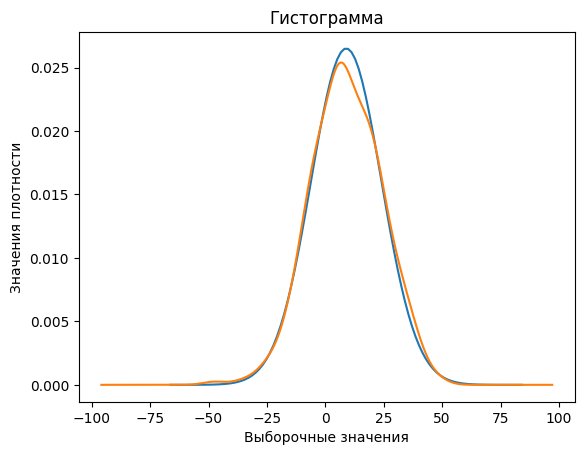

In [149]:
x = np.linspace(mean - 5 * std, mean + 5 * std, 100)
plt.plot(x, stats.norm.pdf(x, mean, std))
sample3.plot.kde()
plt.title("Гистограмма")
plt.ylabel("Значения плотности")
plt.xlabel("Выборочные значения")
plt.show()

Кривая эмпирической плотности близка к кривой плотности нормального распределения, поэтому нормальное распределение подходит для описания исследуемого признака третьей генеральной совокупности.

Построим график сравнения эмпирической функции распределения первой выборки и функции распределения соответствующего нормального распределения:

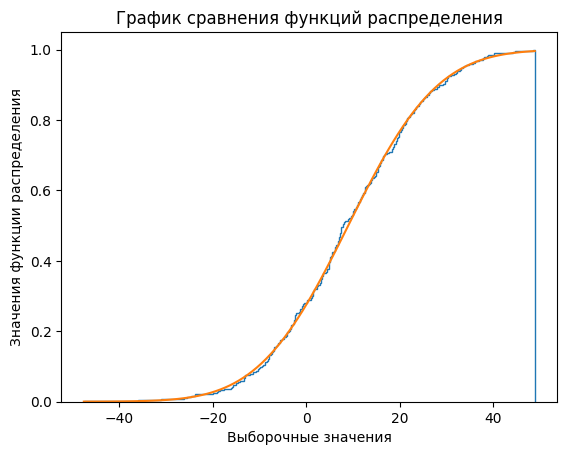

In [150]:
plt.hist(sample3, histtype='step', density=True, cumulative=True,  bins=len(sample3))
x = np.linspace(smin, smax, 100)
plt.plot(x, stats.norm.cdf(x, mean, std))

plt.title("График сравнения функций распределения")
plt.ylabel("Значения функции распределения")
plt.xlabel("Выборочные значения")
plt.show()

Кривая эмпирической функции распределения близка к кривой функции распределения нормального распределения, поэтому нормальное распределение подходит для описания исследуемого признака третьей генеральной совокупности.

Анализ диаграмм показал, что нормальное распределение подходит для описания исследуемого показателя третьей генеральной совокупности.

## Выборка 4

Выделим в отдельные переменные выборочное среднее, выборочное стандартное отклонение, максимум и минимум выборки:

In [151]:
mean = np.mean(sample4)
std = np.std(sample4)
smax = np.max(sample4)
smin = np.min(sample4)

Построим квантильный график:

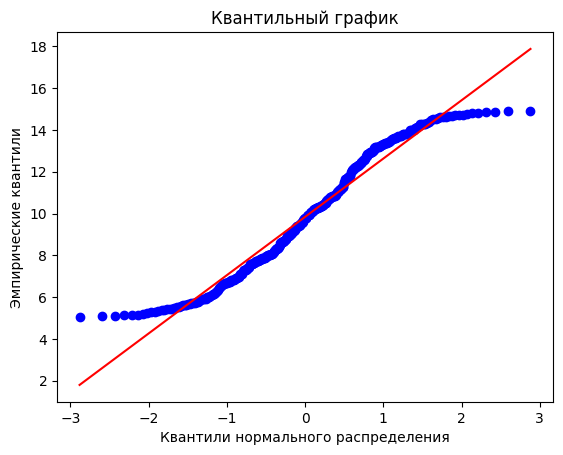

In [152]:
stats.probplot(sample4, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Эмпирические квантили")
plt.xlabel("Квантили нормального распределения")
plt.show()

Точки квантильного графика сильно отклонены от биссектрисы, поэтому нормальное распределение не подходит для описания исследуемого признака четвёртой генеральной совокупности.

Построим диаграмму сравнения эмпирической плотности четвёртой выборки и плотности соответствующего нормального распределения:

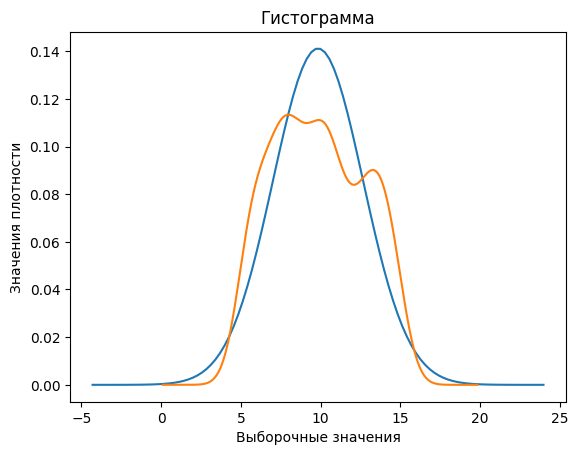

In [153]:
x = np.linspace(mean - 5 * std, mean + 5 * std, 100)
plt.plot(x, stats.norm.pdf(x, mean, std))
sample4.plot.kde()
plt.title("Гистограмма")
plt.ylabel("Значения плотности")
plt.xlabel("Выборочные значения")
plt.show()

Кривая эмпирической плотности сильно отклонена от кривой плотности нормального распределения, поэтому нормальное распределение не подходит для описания исследуемого признака первой генеральной совокупности.

Построим график сравнения эмпирической функции распределения четвёртой выборки и функции распределения соответствующего нормального распределения:

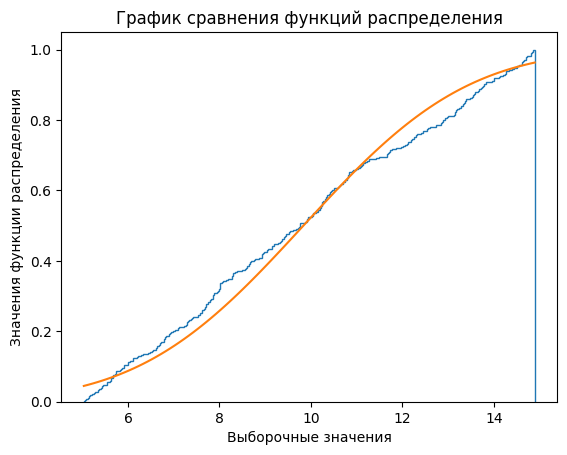

In [154]:
plt.hist(sample4, histtype='step', density=True, cumulative=True,  bins=len(sample4))
x = np.linspace(smin, smax, 100)
plt.plot(x, stats.norm.cdf(x, mean, std))

plt.title("График сравнения функций распределения")
plt.ylabel("Значения функции распределения")
plt.xlabel("Выборочные значения")
plt.show()

Кривая эмпирической функции распределения сильно отклонена от кривой функции распределения нормального распределения, поэтому нормальное распределение не подходит для описания исследуемого признака четвёртой генеральной совокупности.

Анализ диаграмм показал, что нормальное распределение не подходит для описания исследуемого показателя четвёртой генеральной совокупности.

## Итоги визуализации

Анализ графиков и диаграмм показал, что для трех генеральных совокупностей, представленных выборками №1, №2, №3 нормальное распределение подходит для описания исследуемого признака, а для четвёртой генеральной совокупности нормальное распределение не подходит для описания исследуемого признака.

# Использование тестов

## Выборка 1

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для первой генеральной совокупности, представленной соответствующей выборкой тестом Шапиро-Уилка:

In [155]:
stats.shapiro(sample1)

ShapiroResult(statistic=0.9972711801528931, pvalue=0.8310936093330383)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака первой генеральной совокупности не отвергается

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для первой генеральной совокупности, представленной соответствующей выборкой тестом Харке-Бера:

In [156]:
stats.jarque_bera(sample1)

SignificanceResult(statistic=1.1161211331758234, pvalue=0.5723179607608079)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака первой генеральной совокупности не отвергается

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для первой генеральной совокупности, представленной соответствующей выборкой тестом Колмогорова-Смирнова:

In [157]:
stats.kstest(sample1, "norm", (np.mean(sample1), np.std(sample1)))

KstestResult(statistic=0.02866695268297148, pvalue=0.9278651960074522, statistic_location=11.31371393763402, statistic_sign=1)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака первой генеральной совокупности не отвергается

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для первой генеральной совокупности, представленной соответствующей выборкой тестом Крамера-фон Мизеса:

In [158]:
stats.cramervonmises(sample1, "norm", (np.mean(sample1), np.std(sample1)))

CramerVonMisesResult(statistic=0.03326597406788441, pvalue=0.9644359283430133)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака первой генеральной совокупности не отвергается

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для первой генеральной совокупности, представленной соответствующей выборкой тестом Д'Агостино:

In [159]:
stats.normaltest(sample1)

NormaltestResult(statistic=1.0091089220868197, pvalue=0.6037745205797352)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака первой генеральной совокупности не отвергается

Все тесты показали, что для первой генеральной совокупности, представленной соответствующей выборкой, гипотеза о нормальном распределении не отвергается.

## Выборка 2

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для второй генеральной совокупности, представленной соответствующей выборкой тестом Шапиро-Уилка:

In [181]:
stats.shapiro(sample2)

ShapiroResult(statistic=0.8911169767379761, pvalue=4.294658636420749e-15)

p-значение (pvalue) меньше уровня значимости 0,05, следовательно, гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для второй генеральной совокупности, представленной соответствующей выборкой тестом Харке-Бера:

In [161]:
stats.jarque_bera(sample2)

SignificanceResult(statistic=4035.1708107771055, pvalue=0.0)

p-значение (pvalue) меньше уровня значимости 0,05, следовательно, гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для второй генеральной совокупности, представленной соответствующей выборкой тестом Колмогорова-Смирнова:

In [182]:
stats.kstest(sample2, "norm", (np.mean(sample2), np.std(sample2)))

KstestResult(statistic=0.04932564470977284, pvalue=0.3505895313835694, statistic_location=3.118126440094784, statistic_sign=-1)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака второй генеральной совокупности не отвергается

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для второй генеральной совокупности, представленной соответствующей выборкой тестом Крамера-фон Мизеса:

In [163]:
stats.cramervonmises(sample2, "norm", (np.mean(sample2), np.std(sample2)))

CramerVonMisesResult(statistic=0.18942566540807923, pvalue=0.28900587005563694)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака второй генеральной совокупности не отвергается

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для второй генеральной совокупности, представленной соответствующей выборкой тестом Д'Агостино:

In [164]:
stats.normaltest(sample2)

NormaltestResult(statistic=206.85521212277035, pvalue=1.2077065204474929e-45)

p-значение (pvalue) меньше уровня значимости 0,05, следовательно, гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05

Три из пяти теста показали, что для второй генеральной совокупности, представленной соответствующей выборкой гипотеза о нормальном распределении отвергается, следовательно, гипотеза о нормальном распределении второй генеральной совокупности, представленной соответствующей выборкой, отвергается.

## Выборка 3

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для третьей генеральной совокупности, представленной соответствующей выборкой тестом Шапиро-Уилка:

In [165]:
stats.shapiro(sample3)

ShapiroResult(statistic=0.9960692524909973, pvalue=0.5380277633666992)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака третьей генеральной совокупности не отвергается

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для третьей генеральной совокупности, представленной соответствующей выборкой тестом Харке-Бера:

In [166]:
stats.jarque_bera(sample3)

SignificanceResult(statistic=1.4815942143527927, pvalue=0.47673375612903257)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака третьей генеральной совокупности не отвергается

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для третьей генеральной совокупности, представленной соответствующей выборкой тестом Колмогорова-Смирнова:

In [167]:
stats.kstest(sample3, "norm", (np.mean(sample3), np.std(sample3)))

KstestResult(statistic=0.032130059531424005, pvalue=0.8511641057740806, statistic_location=8.168095771688968, statistic_sign=1)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака третьей генеральной совокупности не отвергается

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для третьей генеральной совокупности, представленной соответствующей выборкой тестом Крамера-фон Мизеса:

In [168]:
stats.cramervonmises(sample3, "norm", (np.mean(sample3), np.std(sample3)))

CramerVonMisesResult(statistic=0.030290657647313153, pvalue=0.9753610073534749)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака третьей генеральной совокупности не отвергается

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для третьей генеральной совокупности, представленной соответствующей выборкой тестом Д'Агостино:

In [169]:
stats.normaltest(sample3)

NormaltestResult(statistic=1.7320143953341849, pvalue=0.42062768398137784)

p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака третьей генеральной совокупности не отвергается

Все тесты показали, что для третьей генеральной совокупности, представленной соответствующей выборкой, гипотеза о нормальном распределении не отвергается.

## Выборка 4

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для четвёртой генеральной совокупности, представленной соответствующей выборкой тестом Шапиро-Уилка:

In [170]:
stats.shapiro(sample4)

ShapiroResult(statistic=0.9571124315261841, pvalue=1.3845216528807214e-08)

p-значение (pvalue) меньше уровня значимости 0,05, следовательно, гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для четвёртой генеральной совокупности, представленной соответствующей выборкой тестом Харке-Бера:

In [171]:
stats.jarque_bera(sample4)

SignificanceResult(statistic=19.28016085652942, pvalue=6.506782124513383e-05)

p-значение (pvalue) меньше уровня значимости 0,05, следовательно, гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для четвёртой генеральной совокупности, представленной соответствующей выборкой тестом Колмогорова-Смирнова:

In [172]:
stats.kstest(sample4, "norm", (np.mean(sample4), np.std(sample4)))

KstestResult(statistic=0.07481609296670855, pvalue=0.03772576782190129, statistic_location=8.063142796105838, statistic_sign=1)

p-значение (pvalue) меньше уровня значимости 0,05, следовательно, гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для четвёртой генеральной совокупности, представленной соответствующей выборкой тестом Крамера-фон Мизеса:

In [173]:
stats.cramervonmises(sample4, "norm", (np.mean(sample4), np.std(sample4)))

CramerVonMisesResult(statistic=0.47458107614890604, pvalue=0.046182335912904326)

p-значение (pvalue) меньше уровня значимости 0,05, следовательно, гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для четвёртой генеральной совокупности, представленной соответствующей выборкой тестом Д'Агостино:

In [174]:
stats.normaltest(sample4)

NormaltestResult(statistic=129.4629720324665, pvalue=7.717432110993805e-29)

p-значение (pvalue) меньше уровня значимости 0,05, следовательно, гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05

Все пять тестов показали, что для четвёртой генеральной совокупности, представленной соответствующей выборкой гипотеза о нормальном распределении отвергается, следовательно, гипотеза о нормальном распределении четвёртой генеральной совокупности, представленной соответствующей выборкой, отвергается.

## Итоги исследования

Анализ диаграмм и результаты тестов показывают, что для первой и третьей генеральных совокупностей нормальное распределение подходит для описания исследуемого показателя, а для второй и четвёртой не подходит.

# Заключение

Цель работы — проверить гипотезу о нормальности распределения исследуемого
признака генеральной совокупности.

Была проведена проверка гипотезы о нормальном распределении. Были использованы библиотеки: `pandas`, `matplotlib.pyplot`, `scipy.stats`, `numpy`.

Использованные инструменты: диаграммы и квантильные графики, тесты Шапиро-Уилка, Колмогорова-Смирнова, Крамера-фон Мизеса, Харке-Бера и Д'Агостино. Использовались, соответственно, функции `shapiro`, `jarque_bera`, `kstest`, `cramevonmises` и `normaltest` пакета stats.
По итогам анализа диаграмм и тестов можно сказать:

Анализ диаграмм и результаты тестов показывают, что для первой и третьей генеральных совокупностей нормальное распределение подходит для описания исследуемого показателя, а для второй и четвёртой не подходит.